# Scientific Computing Tools and Visualization
## Lecture 2

We will discuss how the Julia programming language is used for scientific computing and data visualization.

Readings:
* [Julia tutorial](https://learnxinyminutes.com/docs/julia/)


# Scientific Computing

Scientific computing is the process of using "advanced computing capabilities to understand and solve complex problems" [[1](https://en.wikipedia.org/wiki/Computational_science)].

Scientific computing includes:

* Algorithm and data structure design
* Numerical simulation
* Model fitting
* Data analysis
* Optimization

# Julia

<img src="figures/julia.png" alt="Julia" width="400" align="middle">

Julia is a high-level dynamic programming language [[2](https://en.wikipedia.org/wiki/Julia_(programming_language))] that was designed to solve the two-language problem.

__Two language problem__: One typically uses a high-level language like Matlab to do scientific computing and create prototypes, but a low-level language like C to implement resulting solutions.

Julia is both fast and easy to prototype in, and supports a wide range of features such as a built in package manager (so reproducing someone's exact development environment can be done for verification purposes), distributed computing, C and Python interfaces, a powerful REPL, and an elegant type system.

## Installing Packages

Julia makes it easy to install packages. (And specific versions of packages)

Julia makes it easy to obtain packages from GitHub

## Scientific Computing Packages

Julia offers a wide range of [official packages](http://pkg.julialang.org/). There are many custom packages that are not in the official listing as well.

You can go to a package's documentation, typically from GitHub, to view all of its features.

Some of the packages we will be using are:

### DataFrames
This package provides an Excel-table-like type for data processing.

In [1]:
using DataFrames

df = DataFrame(animal=["Dog", "Cat", "Mouse", "Snake", "Sparrow"], legs=[4,4,4,0,2], weight=[100.0, 10.0, 0.68, 2.0, 0.2])

,animal,legs,weight
,String,Int64,Float64
1,Dog,4,100.0
2,Cat,4,10.0
3,Mouse,4,0.68
4,Snake,0,2.0
5,Sparrow,2,0.2


In [2]:
df[2, :animal]

"Cat"

In [3]:
df[2, 1]

"Cat"

In [4]:
df[:legs]

5-element Array{Int64,1}:
 4
 4
 4
 0
 2

### Distributions
This package provides all sorts of probability distributions and methods for sampling from them and inferring them from data.

In [5]:
using Random, Distributions

Random.seed!(0)
dist = Normal(1.0, 2.0)

Normal{Float64}(μ=1.0, σ=2.0)

In [6]:
rand(dist)

2.3582148520715553

In [7]:
data = rand(dist, 10)

10-element Array{Float64,1}:
  2.6568269658000716 
  0.2939851993988074 
  0.7302922561389565 
  2.1732341492662197 
  1.5946717016988323 
  1.1298950970966846 
  0.7819652298365651 
 -0.02842078166664397
  4.148660404273978  
 -0.37781425565139615

In [8]:
fit(Normal, data)

Normal{Float64}(μ=1.3103295966192077, σ=1.3045243823987742)

### Discretizers
This package provides an easy way to discretize data or map between labels and integer values.

In [9]:
using Discretizers

data = ["cat", "dog", "dog", "cat", "cat", "elephant"]
catdisc = CategoricalDiscretizer(data);

In [10]:
println("cat becomes:  ", encode(catdisc, "cat"))
println("dog becomes:  ", encode(catdisc, "dog"))
println("data becomes: ", encode(catdisc, data))

cat becomes:  1
dog becomes:  2
data becomes: [1, 2, 2, 1, 1, 3]


In [11]:
println("1 becomes: ", decode(catdisc, 1))
println("2 becomes: ", decode(catdisc, 2))
println("[1,2,3] becomes: ", decode(catdisc, [1,2,3]))

1 becomes: cat
2 becomes: dog
[1,2,3] becomes: ["cat", "dog", "elephant"]


Here we construct a linear discretizer that maps $[0,0.5)\rightarrow 1$ and $[0.5,1]\rightarrow2$

In [12]:
bin_edges = [0.0,0.5,1.0]
lindisc = LinearDiscretizer(bin_edges);

In [13]:
println("0.2 becomes: ", encode(lindisc, 0.2))
println("0.7 becomes: ", encode(lindisc, 0.7))
println("0.5 becomes: ", encode(lindisc, 0.5))
println("it works on arrays: ", encode(lindisc, [0.0,0.8,0.2]))

0.2 becomes: 1
0.7 becomes: 2
0.5 becomes: 2
it works on arrays: [1, 2, 1]


In [14]:
println("1 becomes: ", decode(lindisc, 1))
println("2 becomes: ", decode(lindisc, 2))
println("it works on arrays: ", decode(lindisc, [2,1,2]))

1 becomes: 0.2696446420713091
2 becomes: 0.6300179251345239
it works on arrays: [0.955023, 0.0835181, 0.827724]


### BayesNets
This package provides a Bayesian Network type and associated algorithms to Julia.

In [15]:
using BayesNets

┌ Info: Recompiling stale cache file C:\Users\mykel\.julia\compiled\v1.0\BayesNets\45zrT.ji for BayesNets [ba4760a4-c768-5bed-964b-cf806dc591cb]
└ @ Base loading.jl:1190


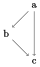

In [16]:
data = DataFrame(c=[1,1,1,1,2,2,2,2,3,3,3,3], 
                 b=[1,1,1,2,2,2,2,1,1,2,1,1],
                 a=[1,1,1,2,1,1,2,1,1,2,1,1])

bn = fit(DiscreteBayesNet, data, (:a=>:b, :a=>:c, :b=>:c))

In [17]:
pdf(bn, :a=>1, :b=>1, :c=>2) # evaluate the probability density

0.08333333333333333

In [18]:
rand(bn)

Dict{Symbol,Any} with 3 entries:
  :a => 1
  :b => 1
  :c => 3

In [19]:
rand(bn, 5) # produces a DataFrame

,a,b,c
,Int64,Int64,Int64
1,1,1,3
2,1,1,3
3,1,1,1
4,1,1,3
5,2,2,3


# Data Visualization & Plotting

Data visualization and plotting are extremely important for the interpretation of scientific results. Julia has many great packages for this.

## Plots
The [Plots.jl](http://docs.juliaplots.org/latest/) package is a wrapper for a number of Julia plotting packages, providing one clean interface to all of them.

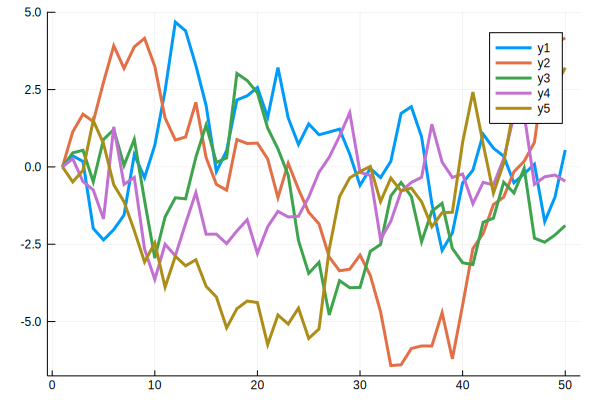

In [20]:
using Plots; gr() # gr() is one of many different backends

Plots.plot(Plots.fakedata(50,5), line=3)

Plotting $f(x)$

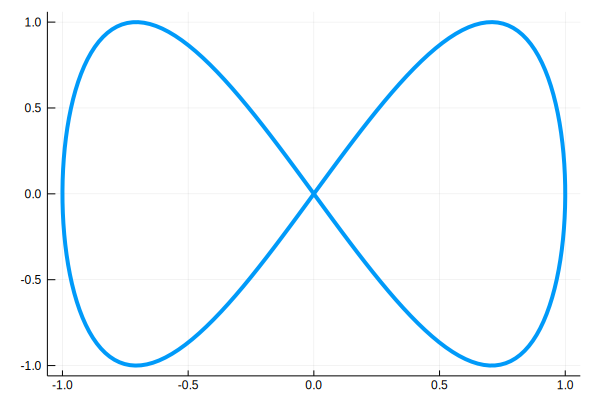

In [21]:
Plots.plot(sin,(x->sin(2x)), 0, 2π, line=4, legend=false)

Plotting x and y arrays

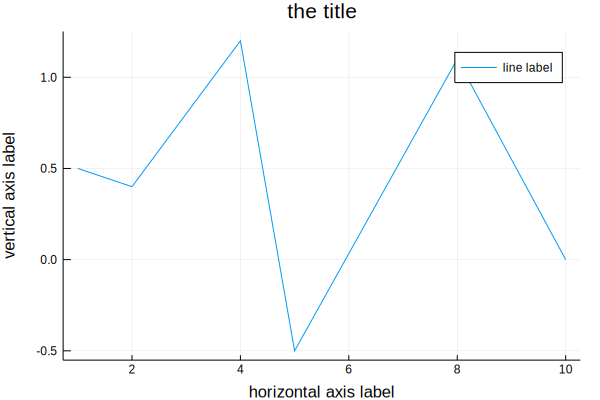

In [22]:
x = [1,2,3,4,5,8,10]
y = [0.5,0.4,0.8,1.2,-0.5,1.1,0.0]
Plots.plot(x,y, xlab="horizontal axis label", ylabel="vertical axis label", label="line label", title="the title")

Layer plots on top of one another

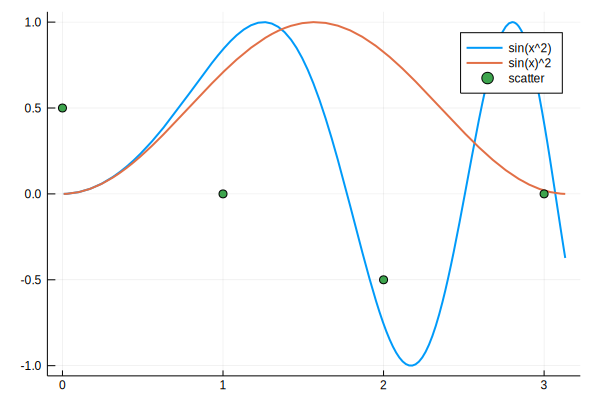

In [23]:
p = Plots.plot(x->sin(x^2), 0, π, line=2, lab="sin(x^2)")
Plots.plot!(p, x->sin(x)^2, 0, π, line=2, lab="sin(x)^2")
Plots.scatter!(p, [0.0, 1.0, 2.0, 3.0], [0.5, 0.0, -0.5, 0.0], lab="scatter")

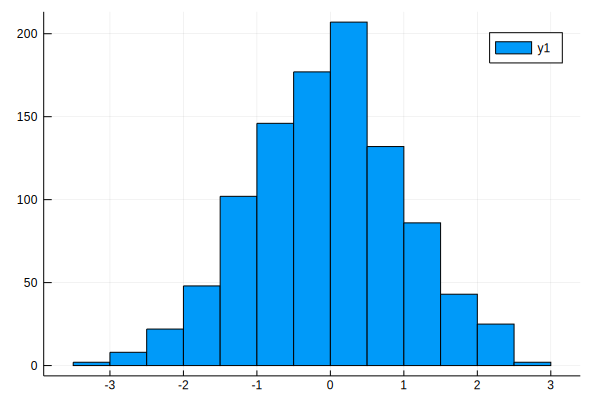

In [24]:
Plots.histogram(randn(1000),nbins=20)

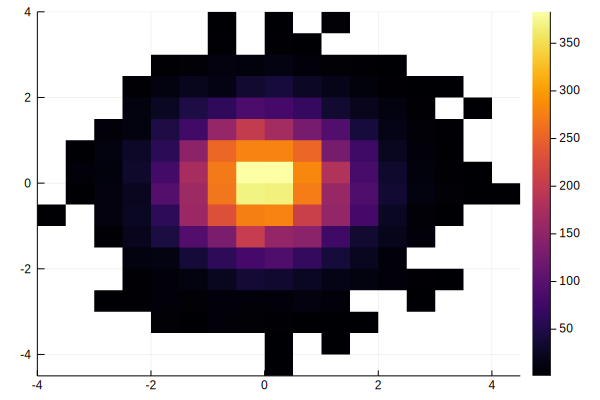

In [25]:
Plots.histogram2d(randn(10000),randn(10000),nbins=20)

Use layouts to put multiple plots in the same figure

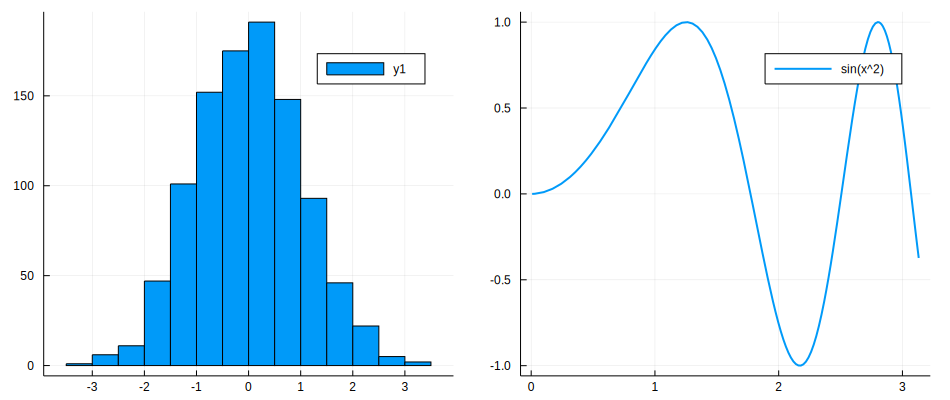

In [26]:
p1 = Plots.histogram(randn(1000),nbins=20)
p2 = Plots.plot(x->sin(x^2), 0, π, line=2, lab="sin(x^2)")
Plots.plot(p1, p2, layout=2, size=(950, 400))

### Data Visualization

Data visualization is more general than plotting, and often involves interaction and more general graphics libraries.

This class uses Reactive, Interact, and Cairo behind the scenes.

In [27]:
using Interact, Colors

@manipulate for r in 0:0.01:1, g in 0:0.01:1, b in 0:0.01:1
    RGB(r, g, b)
end

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/790a2899848cb55930c57eec87df6d5182e9094b-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/790a2899848cb55930c57eec87df6d5182e9094b-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:r=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
51,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09"  …  "0.91", "0.92", "0.93", "0.94", "0.95", "0.96", "0.97", "0.98", "0.99", "1.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.5",:value=>Observable{Float64} with 2 listeners. Value:
0.5), Observable{Float64} with 2 listeners. Value:
0.5, Scope("knockout-component-a7a09488-cd37-4391-828d-448c32d0e0bf", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["r"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09"  …  "0.91", "0.92", "0.93", "0.94", "0.95", "0.96", "0.97", "0.98", "0.99", "1.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.5", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\mykel\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"format

In [28]:
@manipulate for h in 0:360, s in 0:0.01:1, v in 0:0.01:1
    HSV(h, s, v)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:h=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
180), Observable{Int64} with 2 listeners. Value:
180, Scope("knockout-component-b7407840-2421-495a-8e57-42ea7a0e0915", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["h"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>360,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
180, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\mykel\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":180}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-b7407840-2421-495a-8e57-42ea7a0e0915\",\"id\":\"ob_20\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-b7407840-2421-495a-8e57-42ea7a0e0915\",\"id\":\"ob_19\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[

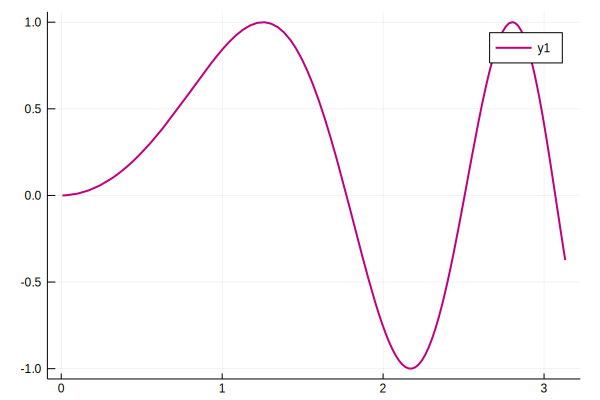

In [29]:
Plots.plot(x->sin(x^2), 0, π, line=2, color=RGB(0.75, 0.0, 0.5))

## SymPy

Symbolic math in Julia!

In [30]:
using SymPy

In [31]:
x = symbols("x")

x

In [32]:
y = sin(pi*x)

sin(pi*x)

In [33]:
y(1)

0

In [34]:
solve(x^2 + 1)

2-element Array{Sym,1}:
 -I
  I

In [35]:
x = symbols("x", real=true)
solve(x^2 + 1)

0-element Array{Sym,1}

In [36]:
y1, y2 = symbols("y1, y2", positive=true)
solve(y1 + 1)    # -1 is not positive

0-element Array{Sym,1}

In [37]:
ex = x^2 + 2x + 1
subs(ex, x, y)

   2                        
sin (pi*x) + 2*sin(pi*x) + 1

In [38]:
subs(ex, x, 0)

1

In [39]:
p = x^2 + 3x + 2
factor(p)

(x + 1)*(x + 2)

In [40]:
solve(cos(x) - sin(x))

2-element Array{Sym,1}:
 -3*pi/4
    pi/4

In [41]:
limit(sin(x)/x, x, 0)

1

In [42]:
diff(x^x, x)

 x             
x *(log(x) + 1)

In [43]:
integrate(x^3, x)

 4
x 
--
4 